# OBJECTIVE #

1.   <b>APPLYING RANDOM FOREST WITH AVG WORD2VEC VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  


In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from tqdm import tqdm


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [10]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [0]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.3,shuffle=False)

In [15]:
list_of_sent=[]
for sent in x_train:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_train[0])
print("*****************************************************************")
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=5,size=50,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:50])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']
***********************************************************************
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'hes', 'learn', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'day', 'thirt

In [18]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TRAIN DATA#################################################################
train_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 train_sent_vectors.append(sent_vec)
print(len(train_sent_vectors))
print(len(train_sent_vectors[0]))

100%|██████████| 70000/70000 [01:25<00:00, 814.41it/s]

70000
50


In [19]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_train_data=StandardScaler( with_mean=False).fit_transform(train_sent_vectors)
print(x_train_data.shape)

(70000, 50)


In [20]:
list_of_sent=[]
for sent in x_test:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_test[0])
print("*****************************************************************")
print(list_of_sent[0])
print('*******************************************************************')


product carbon fruit juic high fructos corn syrup pack calori littl product prefer drink calori plain water tast wasnt pleas left unpleas aftertast also sweet drink made less thirst quencher
*****************************************************************
['product', 'carbon', 'fruit', 'juic', 'high', 'fructos', 'corn', 'syrup', 'pack', 'calori', 'littl', 'product', 'prefer', 'drink', 'calori', 'plain', 'water', 'tast', 'wasnt', 'pleas', 'left', 'unpleas', 'aftertast', 'also', 'sweet', 'drink', 'made', 'less', 'thirst', 'quencher']
*******************************************************************


In [21]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TEST DATA#################################################################
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 30000/30000 [00:38<00:00, 786.82it/s]

30000
50


In [41]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_test_data=StandardScaler( with_mean=False).fit_transform(sent_vectors)
print(x_test_data.shape)

(30000, 50)


In [31]:
#biudling the model
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
rf=RandomForestClassifier(criterion='gini',class_weight={1:.5,0:.5})
tuned_parameters=[{'max_depth':[20,30,40,50,60,80],'n_estimators':[21,30,40,50,70,100]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(rf, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [32]:
%%time
model.fit(x_train_data, y_train)#fiitting the training data


CPU times: user 48.4 s, sys: 276 ms, total: 48.7 s
Wall time: 34min 46s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [20, 30, 40, 50, 60, 80], 'n_estimators': [21, 30, 40, 50, 70, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [33]:
print(model.best_estimator_)#printing the best_estimator

RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=80, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=70, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [34]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results.head()#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,8.740210,0.057351,0.944865,0.996863,20,21,"{'max_depth': 20, 'n_estimators': 21}",34,0.948730,0.998270,...,0.945956,0.996647,0.945093,0.996467,0.939062,0.995634,4.670454,0.005628,0.003170,0.000881
1,12.501804,0.077723,0.946017,0.997540,20,30,"{'max_depth': 20, 'n_estimators': 30}",12,0.949224,0.999519,...,0.946101,0.997220,0.947475,0.996813,0.941526,0.996159,6.589666,0.007625,0.002556,0.001154
2,16.637933,0.101920,0.945213,0.997816,20,40,"{'max_depth': 20, 'n_estimators': 40}",32,0.948613,0.999759,...,0.946003,0.997475,0.947131,0.997159,0.940204,0.996722,8.820613,0.009610,0.002904,0.001053
3,20.628283,0.124750,0.946391,0.997981,20,50,"{'max_depth': 20, 'n_estimators': 50}",2,0.948823,0.999471,...,0.946728,0.997523,0.948291,0.997901,0.941542,0.996397,10.926643,0.011323,0.002576,0.001034
4,28.996505,0.173270,0.946063,0.998126,20,70,"{'max_depth': 20, 'n_estimators': 70}",11,0.948859,0.999807,...,0.947238,0.998273,0.948625,0.997315,0.941564,0.996598,15.459756,0.015753,0.002834,0.001105


In [0]:

results['mean_test_score']=results['mean_test_score']*100
results=results.round(decimals=2)
results['cv_error_score']=100-results['mean_test_score']

# PLOTTING THE HEATMAP WITH  HYPERPARAMETERS FOR CV_ERROR SCORE 

In [0]:
test_score_heatmap=results.pivot(	'param_max_depth'	,'param_n_estimators','cv_error_score'	)

In [37]:
test_score_heatmap

param_n_estimators,21,30,40,50,70,100
param_max_depth,,,,,,
20,5.51,5.40,5.48,5.36,5.39,5.37
30,5.52,5.43,5.42,5.48,5.42,5.41
40,5.47,5.44,5.36,5.39,5.42,5.39
50,5.46,5.40,5.38,5.41,5.40,5.44
60,5.59,5.47,5.37,5.41,5.47,5.39
80,5.46,5.39,5.41,5.47,5.36,5.41


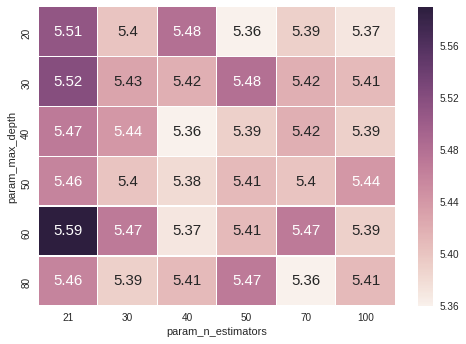

In [38]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [39]:
print(model.best_estimator_)#printing the best_estimator

RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=80, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=70, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=80 AND N_ESTIMATORS=70

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

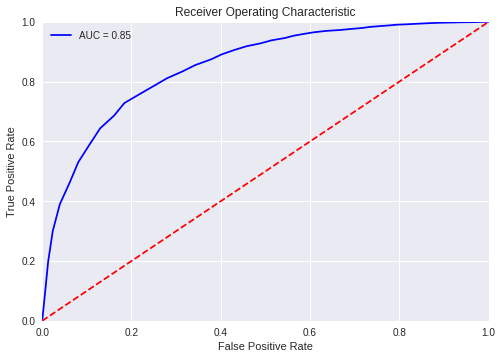

In [42]:
rf=RandomForestClassifier(criterion='gini',class_weight={1:.5,0:.5},max_depth=80 ,n_estimators=70)
rf.fit(x_train_data,y_train)#fitting the model 
probs = rf.predict_proba(x_test_data)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#plotting the auc curve with best hyperparameters to get auc value
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  85.112476107286


# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 89.080%
Precision on test set: 0.894
Recall on test set: 0.994
F1-Score on test set: 0.941
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



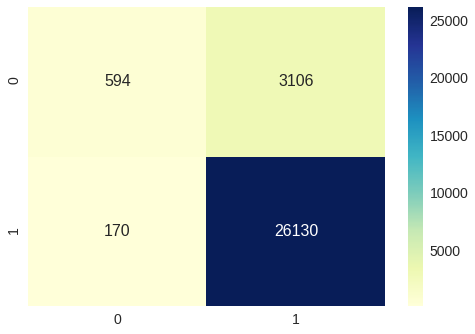

In [44]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
#building the model
y_pred = rf.predict(x_test_data) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap="YlGnBu")


# AVG WORD2VEC VECTORIZATION FOR RANDOM  FOREST IS COMPLETED 

# OBJECTIVE #

1.   <b>APPLYING GBDT WITH AVG WORD2VEC VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  


In [45]:
from xgboost import XGBClassifier
#biudling the model
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
xg=XGBClassifier(n_jobs=-1)
tuned_parameters=[{'max_depth':[20,30,40,50,60,80],'n_estimators':[21,30,40,50,70,100]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(xg, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [46]:
%%time
model.fit(x_train_data, y_train)#fiitting the training data


CPU times: user 2min 8s, sys: 386 ms, total: 2min 9s
Wall time: 1h 17min 46s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [20, 30, 40, 50, 60, 80], 'n_estimators': [21, 30, 40, 50, 70, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [47]:
print(model.best_estimator_)#printing the best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=40, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [48]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results.head()#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,21.150612,0.071006,0.944721,0.996258,20,21,"{'max_depth': 20, 'n_estimators': 21}",36,0.946500,0.996545,...,0.947456,0.996360,0.943697,0.995799,0.939878,0.995834,11.977900,0.009676,0.002719,0.000381
1,29.628869,0.097126,0.946084,0.998488,20,30,"{'max_depth': 20, 'n_estimators': 30}",30,0.947373,0.998846,...,0.948269,0.998544,0.946238,0.998332,0.941187,0.998176,16.482376,0.015790,0.002532,0.000226
2,38.470601,0.124978,0.946626,0.999468,20,40,"{'max_depth': 20, 'n_estimators': 40}",25,0.948497,0.999567,...,0.948595,0.999520,0.947178,0.999399,0.941967,0.999356,21.191564,0.018832,0.002427,0.000078
3,46.729607,0.147422,0.947057,0.999787,20,50,"{'max_depth': 20, 'n_estimators': 50}",23,0.948560,0.999856,...,0.950000,0.999792,0.946607,0.999784,0.943236,0.999769,26.185854,0.023353,0.002269,0.000039
4,62.315705,0.208297,0.947818,0.999981,20,70,"{'max_depth': 20, 'n_estimators': 70}",11,0.948837,1.000000,...,0.952179,0.999968,0.947002,0.999964,0.943320,0.999971,34.963135,0.040558,0.002862,0.000016


In [0]:
results['mean_test_score']=results['mean_test_score']*100

results=results.round(decimals=2)

results['cv_error_score']=100-results['mean_test_score']



# PLOTTING THE HEATMAP WITH HYPERPARAMETERS FOR CV_ERROR SCORE

In [50]:

test_score_heatmap=results.pivot( 'param_max_depth' ,'param_n_estimators','cv_error_score'  )

test_score_heatmap


param_n_estimators,21,30,40,50,70,100
param_max_depth,,,,,,
20,5.53,5.39,5.34,5.29,5.22,5.18
30,5.47,5.33,5.27,5.25,5.23,5.17
40,5.49,5.36,5.26,5.23,5.20,5.13
50,5.49,5.36,5.26,5.23,5.20,5.13
60,5.49,5.36,5.26,5.23,5.20,5.13
80,5.49,5.36,5.26,5.23,5.20,5.13


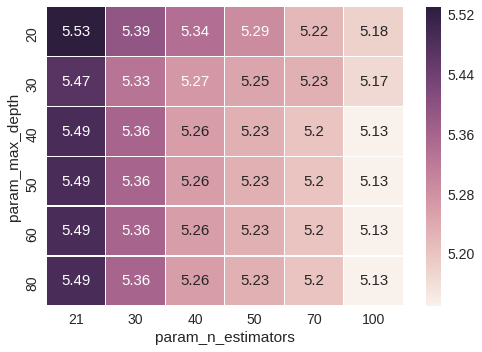

In [51]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [52]:
print(model.best_estimator_)#printing the best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=40, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=40 AND N_ESTIMATORS=100

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

In [54]:
xg=XGBClassifier(n_jobs=-1,max_depth=40 ,n_estimators=100)
xg.fit(x_train_data,y_train)#fitting the model 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=40, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

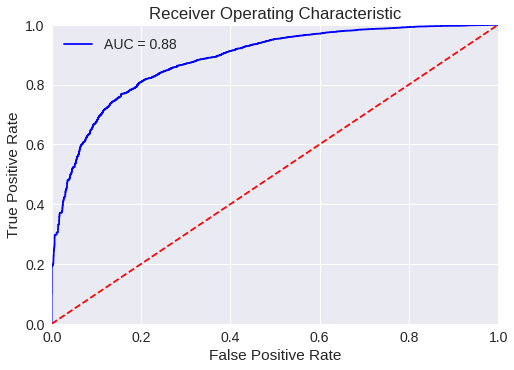

In [55]:
probs = xg.predict_proba(x_test_data)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  88.3943536121673


# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 89.813%
Precision on test set: 0.905
Recall on test set: 0.987
F1-Score on test set: 0.944
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



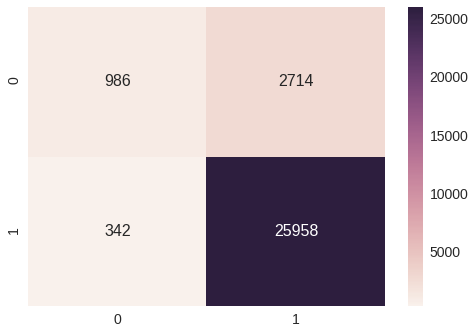

In [56]:

y_pred = xg.predict(x_test_data)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


# avg word2vec for random forest and gbdt is completed